<h3>  &nbsp;&nbsp;Train on GPU&nbsp;&nbsp; <a href="https://cloud.google.com/tpu/"><img valign="middle" src="https://raw.githubusercontent.com/GoogleCloudPlatform/tensorflow-without-a-phd/master/tensorflow-rl-pong/images/tpu-hexagon.png" width="50"></a></h3>

1. On the main menu, click Runtime and select **Change runtime type**. Set "GPU" as the hardware accelerator.
1. Click Runtime again and select **Runtime > Run All**. You can also run the cells manually with Shift-ENTER. 

In [1]:
import keras
keras.__version__

Using TensorFlow backend.


'2.2.4'

In [2]:
import tensorflow.keras.models as models
import tensorflow.keras.layers as layers 
import tensorflow.keras.optimizers as optimizers

from keras.datasets import cifar10
from keras.utils import to_categorical

import numpy as np

In [3]:
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# MODIFY THE CODE TO ADD A VALIDATION SET

validation_images = train_images[40000:]
validation_labels = train_labels[40000:]

train_images = train_images[:40000]
train_labels = train_labels[:40000]

In [4]:
# CHECKER:

print("Training set: images {:}\tlabels: {:}".format(train_images.shape, train_labels.shape ) )
print("validation set: images {:}\tlabels: {:}".format(validation_images.shape, validation_labels.shape ) )
print("Test set: images {:}\tlabels: {:}".format(test_images.shape, test_labels.shape ) )

Training set: images (40000, 32, 32, 3)	labels: (40000, 1)
validation set: images (10000, 32, 32, 3)	labels: (10000, 1)
Test set: images (10000, 32, 32, 3)	labels: (10000, 1)


In [5]:
train_images = train_images.reshape((40000, 32, 32, 3))
train_images = train_images.astype('float32') / 255

validation_images = validation_images.reshape((10000, 32, 32, 3))
validation_images = validation_images.astype('float32') / 255

test_images = test_images.reshape((10000, 32, 32, 3))
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
validation_labels = to_categorical(validation_labels)
test_labels = to_categorical(test_labels)

In [6]:
print("Training set: images {:}\tlabels: {:}".format(train_images.shape, train_labels.shape ) )
print("validation set: images {:}\tlabels: {:}".format(validation_images.shape, validation_labels.shape ) )
print("Test set: images {:}\tlabels: {:}".format(test_images.shape, test_labels.shape ) )

Training set: images (40000, 32, 32, 3)	labels: (40000, 10)
validation set: images (10000, 32, 32, 3)	labels: (10000, 10)
Test set: images (10000, 32, 32, 3)	labels: (10000, 10)


In [7]:
from tensorflow.keras.applications.resnet_v2 import ResNet50V2 

conv_base = ResNet50V2(include_top=False, weights='imagenet',
                             input_shape=(32, 32, 3), 
                             pooling='avg')

conv_base.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 32, 32, 3)]  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 38, 38, 3)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 16, 16, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 18, 18, 64)   0           conv1_conv[0][0]                 
_________________________________________________________________________________________

## Features extraction

In [8]:
def extract_features(input_data):
    return conv_base.predict(input_data) 

train_features = extract_features(train_images)
validation_features = extract_features(validation_images)
test_features = extract_features(test_images)

In [9]:
print("train features:", train_features.shape)
print("validation features:", validation_features.shape)
print("test features:", test_features.shape)

train features: (40000, 2048)
validation features: (10000, 2048)
test features: (10000, 2048)


In [ ]:
STOOP... think about the size!

In [ ]:
train_features_vectorized = np.reshape(train_features, (len(train_labels) , 512))
validation_features_vectorized = np.reshape(validation_features, (len(validation_labels),512))
test_features_vectorized = np.reshape(test_features, (len(test_labels), 512))

print("train features:", train_features_vectorized.shape)
print("validation features:", validation_features_vectorized.shape)
print("test features:", test_features_vectorized.shape)

In [18]:
model = models.Sequential()

#model.add(layers.Conv2D(32, (3,3), activation='relu', padding = 'same', input_shape=(32, 32, 3)))
#model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Dense(1024, activation='relu', input_dim= 2048))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))


model.compile(optimizer=optimizers.RMSprop(lr=2e-4),
              loss='categorical_crossentropy',
                  metrics=['accuracy'])


model_hist = model.fit(train_features, train_labels,
                    epochs=100,
                    batch_size=1024,
                    validation_data=(validation_features, validation_labels))

Train on 40000 samples, validate on 10000 samples
Epoch 1/100
40000/40000 [==============================] - 17s 415us/sample - loss: 2.3214 - accuracy: 0.1108 - val_loss: 2.2823 - val_accuracy: 0.1812
Epoch 2/100
40000/40000 [==============================] - 16s 394us/sample - loss: 2.2891 - accuracy: 0.1312 - val_loss: 2.2544 - val_accuracy: 0.2068
Epoch 3/100
40000/40000 [==============================] - 16s 389us/sample - loss: 2.2555 - accuracy: 0.1577 - val_loss: 2.2072 - val_accuracy: 0.2319
Epoch 4/100
40000/40000 [==============================] - 15s 378us/sample - loss: 2.2149 - accuracy: 0.1873 - val_loss: 2.1438 - val_accuracy: 0.2467
Epoch 5/100
40000/40000 [==============================] - 15s 385us/sample - loss: 2.1663 - accuracy: 0.2114 - val_loss: 2.0821 - val_accuracy: 0.2688
Epoch 6/100
40000/40000 [==============================] - 15s 369us/sample - loss: 2.1177 - accuracy: 0.2273 - val_loss: 2.0295 - val_accuracy: 0.2855
Epoch 7/100
40000/40000 [=============

40000/40000 [==============================] - 15s 371us/sample - loss: 1.3962 - accuracy: 0.5131 - val_loss: 1.8035 - val_accuracy: 0.3997
Epoch 55/100
40000/40000 [==============================] - 15s 381us/sample - loss: 1.3863 - accuracy: 0.5210 - val_loss: 1.8057 - val_accuracy: 0.3969
Epoch 56/100
40000/40000 [==============================] - 15s 378us/sample - loss: 1.3775 - accuracy: 0.5215 - val_loss: 1.8119 - val_accuracy: 0.3985
Epoch 57/100
40000/40000 [==============================] - 15s 380us/sample - loss: 1.3712 - accuracy: 0.5268 - val_loss: 1.8177 - val_accuracy: 0.3978
Epoch 58/100
40000/40000 [==============================] - 15s 384us/sample - loss: 1.3530 - accuracy: 0.5350 - val_loss: 1.8185 - val_accuracy: 0.3987
Epoch 59/100
40000/40000 [==============================] - 15s 381us/sample - loss: 1.3407 - accuracy: 0.5373 - val_loss: 1.8252 - val_accuracy: 0.3943
Epoch 60/100
40000/40000 [==============================] - 15s 387us/sample - loss: 1.3342 - a

KeyboardInterrupt: 

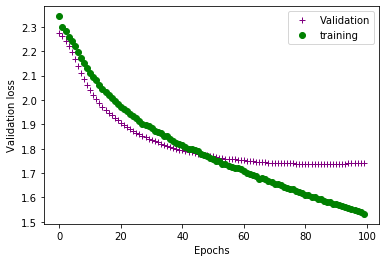

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

train_loss = model_hist.history['loss']
val_loss= model_hist.history['val_loss']

epochs_val = range(0, len(train_loss))
epochs = range(0, len(train_loss))

plt.plot(epochs_val, val_loss, 'b+', label='Validation', c = 'purple')
plt.plot(epochs, train_loss, 'bo', label='training', c ='green')
plt.xlabel('Epochs')
plt.ylabel('Validation loss')
plt.legend()

plt.show()

In [17]:
test_loss, test_acc = model.evaluate(test_features, test_labels)
print('test_acc:', test_acc)
test_loss

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

test_acc: 0.4029


1.732647918319702

In [ ]:
model.save_weights('./cifar10_VGG16.h5', overwrite=True)